<span style="color:blue; font-size:30px;">This script contains the following:</span>
 
##  01. Import Libraries
##  02. Import Data
##  03. Data Preprocessing
##  04. The Elbow Technique
##  05. Run the K-means Algorithm
##  06. Attach Cluster Labels to the Dataframe
##  07. Create Visualizations of the Clustered Data
##  08. Calculate Descriptive Statistics for Clusters using Groupby
##  09. Discussion for Descriptive Statistics for Clusters


##  01. Import Libraries

In [147]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl

##  02. Import Data

In [148]:
# import data
path = r'/Users/ashwanisherawat/Downloads'

In [149]:
# Step 1: Define file paths for the new datasets
directory = ''r'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam '
df_clean = os.path.join(directory, 'Cleaned_Airbnb_Dataset.csv')

In [150]:
# Import CSVs using list
#listing.csv
cleaned_df = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Cleaned_Airbnb_Dataset.csv'), index_col = False)

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_1790/817318685.py:3: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Cleaned_Airbnb_Dataset.csv'), index_col = False)


##  03. Data Preprocessing

In [151]:
cleaned_df.shape

(18193, 71)

In [152]:
cleaned_df.head()

,id,name_x,host_id,host_name,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,cancellation_policy,calculated_host_listings_count_y,host_category
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,10.0,10.0,10.0,9.0,10.0,f,NaN,strict_14_with_grace_period,1,single_listing
1,3209,"Quiet apt near center, great view",3806,maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,...,9.0,10.0,10.0,9.0,9.0,f,NaN,moderate,1,single_listing
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,...,10.0,9.0,9.0,10.0,9.0,f,NaN,strict_14_with_grace_period,2,multi_listing
3,25428,Lovely apt in City Centre (Jordaan),56142,joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,...,10.0,10.0,10.0,10.0,10.0,f,NaN,strict_14_with_grace_period,2,multi_listing
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,...,10.0,10.0,10.0,10.0,10.0,f,NaN,strict_14_with_grace_period,1,single_listing


In [153]:
# Drop non-numeric columns
cleaned_df1 = cleaned_df.select_dtypes(include=[np.number])

In [154]:
# Verify non-numeric columns are dropped
print(cleaned_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18193 entries, 0 to 18192
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                18193 non-null  int64  
 1   host_id                           18193 non-null  int64  
 2   neighbourhood_group               0 non-null      float64
 3   latitude_x                        18193 non-null  float64
 4   longitude_x                       18193 non-null  float64
 5   price_x                           18193 non-null  int64  
 6   minimum_nights_x                  18193 non-null  int64  
 7   number_of_reviews_x               18193 non-null  int64  
 8   reviews_per_month                 15972 non-null  float64
 9   calculated_host_listings_count_x  18193 non-null  int64  
 10  availability_365_x                18193 non-null  int64  
 11  neighbourhood_group_cleansed      0 non-null      float64
 12  lati

In [155]:
# Select relevant features for clustering
features = cleaned_df1[['price_x', 'availability_365_y']]

In [156]:
# Verify selection
print(features.head())

   price_x  availability_365_y
0       59                  44
1      160                  47
2       80                 198
3      125                 141
4      150                 199


In [157]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [158]:
# Verify standardization
print(pd.DataFrame(scaled_features, columns=features.columns).head())

    price_x  availability_365_y
0 -1.149466           -0.129567
1  0.196427           -0.100110
2 -0.869627            1.382562
3 -0.269971            0.822878
4  0.063170            1.392381


# 4. The Elbow Technique

In [159]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

/Users/ashwanisherawat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ashwanisherawat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ashwanisherawat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ashwanisherawat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[-36385.99999999995,
 -20559.397549744,
 -11924.433888327665,
 -8632.952596203719,
 -6922.032882625933,
 -5721.265518707007,
 -4686.628982218266,
 -4022.9628489695756,
 -3453.1210245649363]

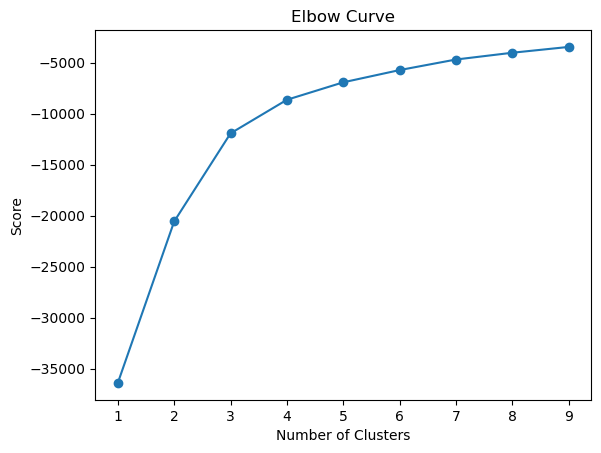

In [160]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [161]:
# Correct the output path definition
output_path = path + 'Air BNB Amsterdam elbow_method_pylab.png'  # Adjust the file path if needed

# Save the plot
plt.savefig(output_path)


<Figure size 640x480 with 0 Axes>

## Decision about the number of clusters 

#### Based on the elbow curve, the optimal number of clusters appears to be 4, as the slope significantly decreases beyond this point, indicating diminishing returns in reducing inertia.

# 5. Run the K-means Algorithm

In [162]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

# 6. Attach Cluster Labels to the Dataframe

In [163]:
# Add the cluster labels to the original dataframe and to the subset
cleaned_df['Cluster'] = kmeans.fit_predict(scaled_features)
cleaned_df1['Cluster'] = kmeans.fit_predict(scaled_features)

In [164]:
# Verify cluster assignment
print(cleaned_df1.head())

      id  host_id  neighbourhood_group  latitude_x  longitude_x  price_x  \
0   2818     3159                  NaN   52.365755     4.941419       59   
1   3209     3806                  NaN   52.390225     4.873924      160   
2  20168    59484                  NaN   52.365087     4.893541       80   
3  25428    56142                  NaN   52.373114     4.883668      125   
4  27886    97647                  NaN   52.386727     4.892078      150   

   minimum_nights_x  number_of_reviews_x  reviews_per_month  \
0                 3                  248               2.10   
1                 4                   42               1.03   
2                 1                  233               2.18   
3                14                    1               0.09   
4                 2                  171               2.03   

   calculated_host_listings_count_x  ...  number_of_reviews_y  \
0                                 1  ...                  248   
1                                 

# 7. Create Visualizations of the Clustered Data

In [ ]:
# Plotting the clusters of Proce C and availability for 365 days 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_df1, x='price_x', y='availability_365_x', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Air BNB  Data with 4 Clusters')
plt.xlabel('price')
plt.ylabel('Availability 365')
plt.legend(title='Cluster')
plt.show()

In [166]:
# Export the scatterplot of clusters
file_name = os.path.join(path, 'Air BNB Amsterdam ', 'kmeans_clustering.png')
plt.savefig(file_name)

<Figure size 640x480 with 0 Axes>

In [167]:
 # Select relevant features for clustering
selected_features = ['price_x', 'availability_365_x', 'number_of_reviews_x', 'review_scores_rating', 'accommodates']
cleaned_df1 = cleaned_df1[selected_features]

In [168]:
# Handle missing values by filling them with the median
cleaned_df1 = cleaned_df1.fillna(cleaned_df1.median())

# Verify if any NaN values remain
if cleaned_df1.isna().sum().sum() > 0:
    print("There are still missing values in the dataset.")
else:
    print("All missing values have been handled.")

All missing values have been handled.


In [169]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df1) 

In [170]:


# Perform K-means clustering with an optimal number of clusters (assumed 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cleaned_df1['Cluster'] = kmeans.fit_predict(scaled_data)



/Users/ashwanisherawat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [171]:
# Analyze the clustering results
cluster_summary = cleaned_df1.groupby('Cluster').mean()


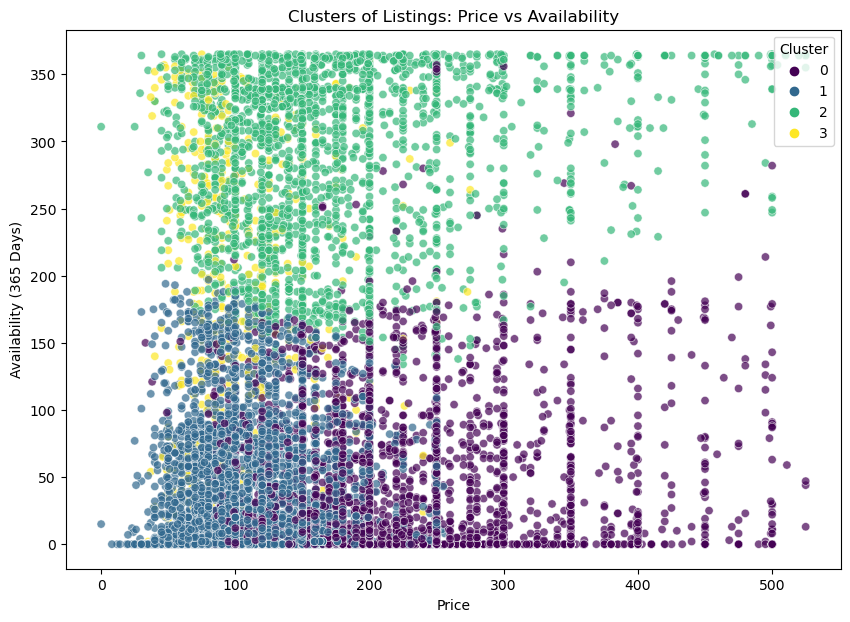

In [172]:

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=cleaned_df1['price_x'],
    y=cleaned_df1['availability_365_x'],
    hue=cleaned_df1['Cluster'],
    palette='viridis',
    alpha=0.7
)
plt.title('Clusters of Listings: Price vs Availability')
plt.xlabel('Price')
plt.ylabel('Availability (365 Days)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

### **Brief Observations**

1. **Cluster 0 (Purple)**: 
   - Listings are moderately priced (~$150-$250).
   - Availability is limited (~50-200 days).
   - Likely caters to mid-range travelers.

2. **Cluster 1 (Blue)**:
   - Budget-friendly listings (~$50-$150).
   - High availability (~200-350 days).
   - Suitable for long-term stays or consistent bookings.

3. **Cluster 2 (Green)**:
   - Premium listings (~$200-$500).
   - Wide availability (~150-365 days).
   - Represents high-demand or luxury options.

4. **Cluster 3 (Yellow)**:
   - Low-cost listings (~$0-$150).
   - Very limited availability (~0-100 days).
   - Likely seasonal or part-time rentals.


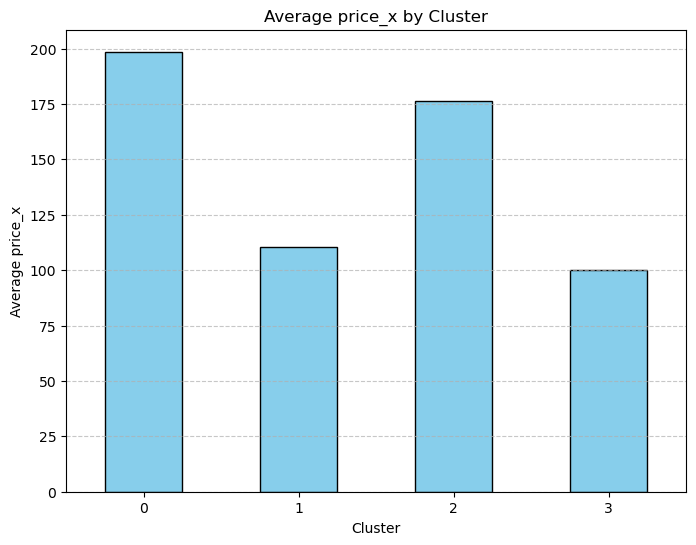

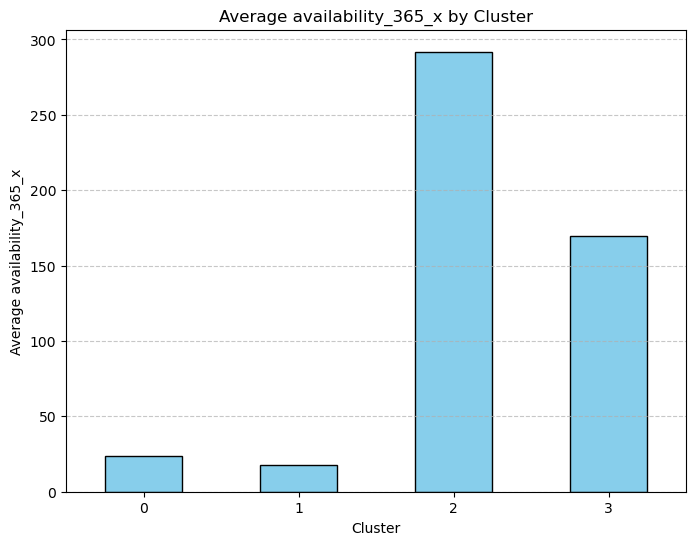

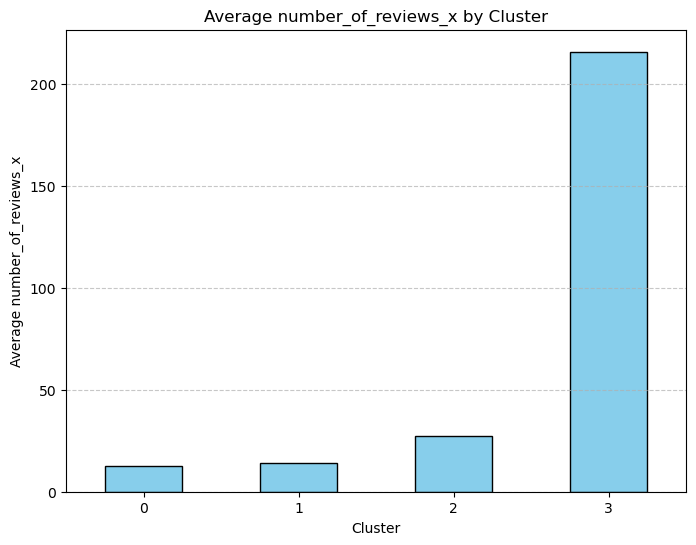

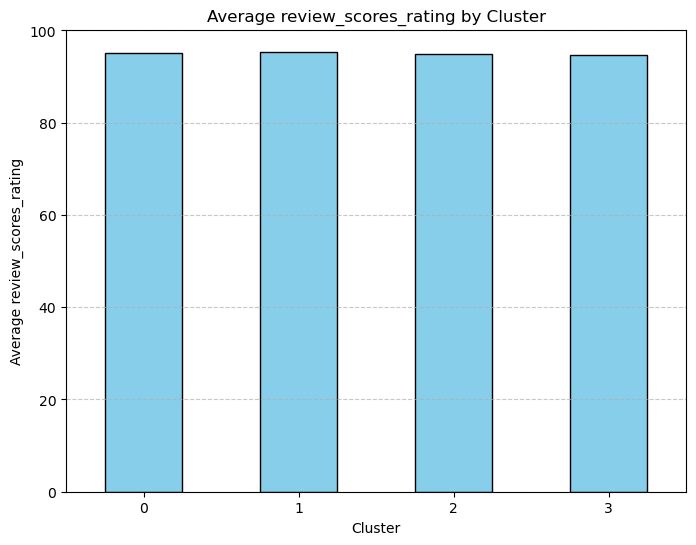

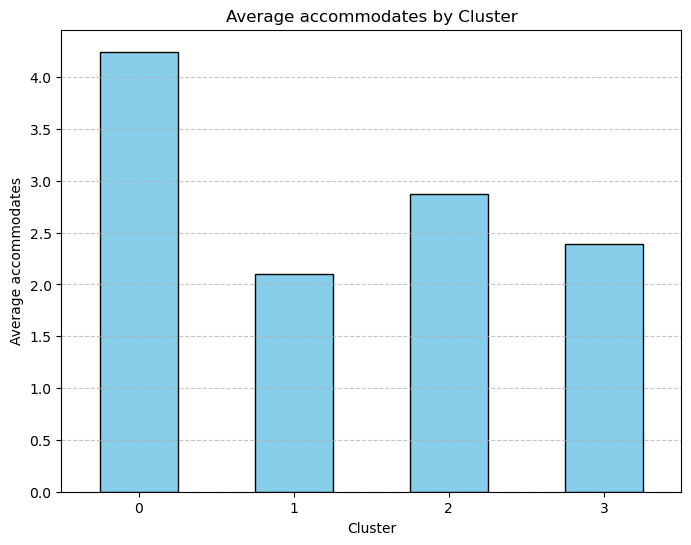

In [173]:
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    cleaned_df1.groupby('Cluster')[feature].mean().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### **Brief Observations from the Charts**

1. **Accommodates by Cluster**:
   - **Cluster 0** has the highest average accommodation capacity (~4 people), suitable for families or larger groups.
   - **Clusters 1, 2, and 3** accommodate smaller groups (average 2-3 people).

2. **Review Scores by Cluster**:
   - Review scores are consistently high across all clusters (~95-100), indicating good overall satisfaction with listings.

3. **Number of Reviews by Cluster**:
   - **Cluster 3** has significantly more reviews on average compared to other clusters, indicating higher popularity or longer market presence.
   - Other clusters have much fewer reviews, suggesting less engagement or newer listings.

4. **Availability (365 days) by Cluster**:
   - **Cluster 2** has the highest availability (~300 days/year), likely representing full-time or frequently available listings.
   - Other clusters, especially **Clusters 0 and 1**, show limited availability (~20-50 days/year).

5. **Price by Cluster**:
   - **Cluster 0** has the highest average price (~$200), indicating premium listings.
   - **Cluster 1** has the lowest average price (~$110), appealing to budget-conscious travelers.
   - **Clusters 2 and 3** fall in the mid-range category.

---

### **General Insights**:
- **Cluster 0**: Premium listings with higher accommodation capacity and limited availability.
- **Cluster 1**: Budget-friendly, smaller listings with low availability and fewer reviews.
- **Cluster 2**: Mid-range listings with high availability and steady customer engagement.
- **Cluster 3**: Affordable and popular listings with high review activity.

These insights can be used to design targeted marketing strategies, improve pricing models, and tailor services for different traveler segments. Let me know if you'd like further analysis or recommendations!

# 8. Calculate Descriptive Statistics for Clusters using Groupby

In [174]:
# Descriptive stats for clusters
cluster_stats = cleaned_df1.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

        price_x                                 availability_365_x  \
          count        mean        std min  max              count   
Cluster                                                              
0          5600  198.589286  82.296225  33  525               5600   
1          9825  110.675216  37.801762   0  300               9825   
2          2179  176.380450  92.145291   0  525               2179   
3           589   99.981324  41.362073  32  275                589   

                                           ... review_scores_rating  \
               mean         std  min  max  ...                count   
Cluster                                    ...                        
0         23.912143   44.842227    0  357  ...                 5600   
1         17.400000   35.189448    0  197  ...                 9825   
2        291.839376   62.594794  134  365  ...                 2179   
3        169.400679  113.625515    0  365  ...                  589   

           

# **09. Discussion for Descriptive Statistics for Clusters**

#### **Cluster 0**:
- **Price**: High at **$198** (min: $33, max: $525).
- **Availability**: Low, averaging **24 days/year**.
- **Reviews**: Moderate, fewer in number.
- **Accommodates**: Capacity averages **4 people**.

#### **Cluster 1**:
- **Price**: Lowest at **$110**.
- **Availability**: Very low at **17 days/year**.
- **Reviews**: Fewer reviews with average scores.
- **Accommodates**: Small capacity, **2 people on average**.

#### **Cluster 2**:
- **Price**: Mid-range at **$176**.
- **Availability**: Highest at **292 days/year**.
- **Reviews**: High ratings and many reviews.
- **Accommodates**: Moderate capacity, **3 people**.

#### **Cluster 3**:
- **Price**: Low at **$99**.
- **Availability**: Moderate at **169 days/year**.
- **Reviews**: Moderate scores and review counts.
- **Accommodates**: Larger capacity, **2-12 people**.

---

### **Applications in Analytics Pipeline**

1. **Targeted Marketing**: 
   - **Cluster 1 & 3**: Budget-conscious travelers.
   - **Cluster 2**: Loyal customers or frequent users.
   
2. **Revenue Strategy**:
   - **Cluster 0**: Premium pricing for short-term availability.
   - **Cluster 2**: Maximize returns with high-demand listings.

3. **Customer Segmentation**: 
   - Use preferences to design personalized campaigns.

4. **Service Focus**:
   - Improve reviews and satisfaction for **Cluster 1 & 3**.